In [1]:
import pandas as pd

# braki danych
import missingno as msno
# wizualizacje
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_transformed = pd.read_csv('data_for_missvalues_outliers_analysis.csv', index_col=0)

# Analiza braków

*Miejsce na funkcje*

In [3]:
# przygotowanie zbioru do analizy
data_miss_value = data_transformed[['price', 'address', 'area', 'num_rooms',
                                    'ap_floor', 'number_floor_in_building', 'rent_cat',
                                    'ownership_status', 'flat_condition', 'perks',
                                    'parking', 'heating', 'market', 'ad_type', 'availability',
                                    'year', 'devel_type', 'windowa', 'lift', 'utilities',
                                    'security', 'equipment', 'add_inf', 'mater']].replace('nie podano', None)
data_miss_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46782 entries, 0 to 46781
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     44673 non-null  float64
 1   address                   46782 non-null  object 
 2   area                      46782 non-null  float64
 3   num_rooms                 46782 non-null  int64  
 4   ap_floor                  45547 non-null  float64
 5   number_floor_in_building  44544 non-null  float64
 6   rent_cat                  21268 non-null  float64
 7   ownership_status          38624 non-null  object 
 8   flat_condition            39317 non-null  object 
 9   perks                     35823 non-null  object 
 10  parking                   46782 non-null  int64  
 11  heating                   40754 non-null  object 
 12  market                    46782 non-null  object 
 13  ad_type                   46782 non-null  object 
 14  availa

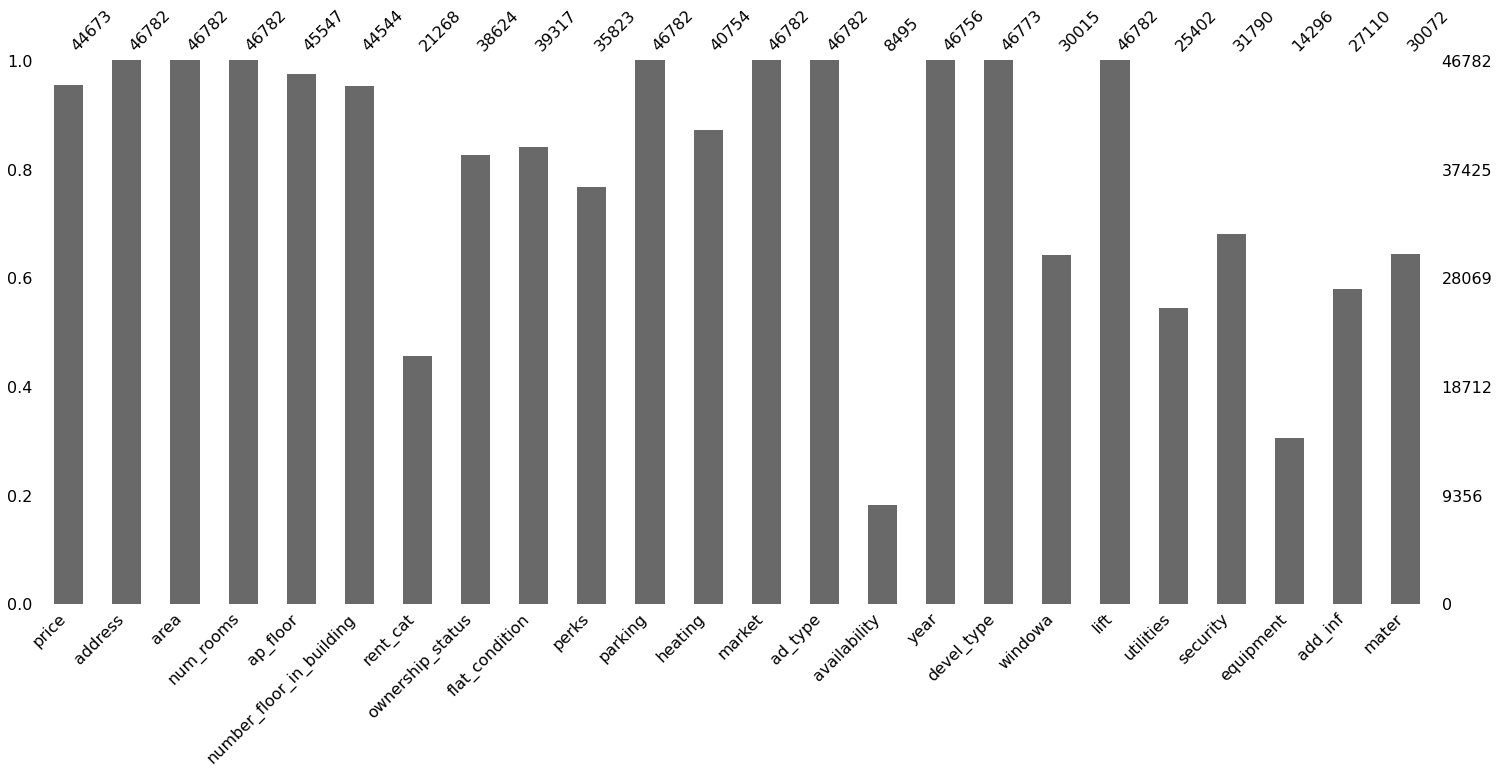

In [4]:
msno.bar(data_miss_value)
plt.show()

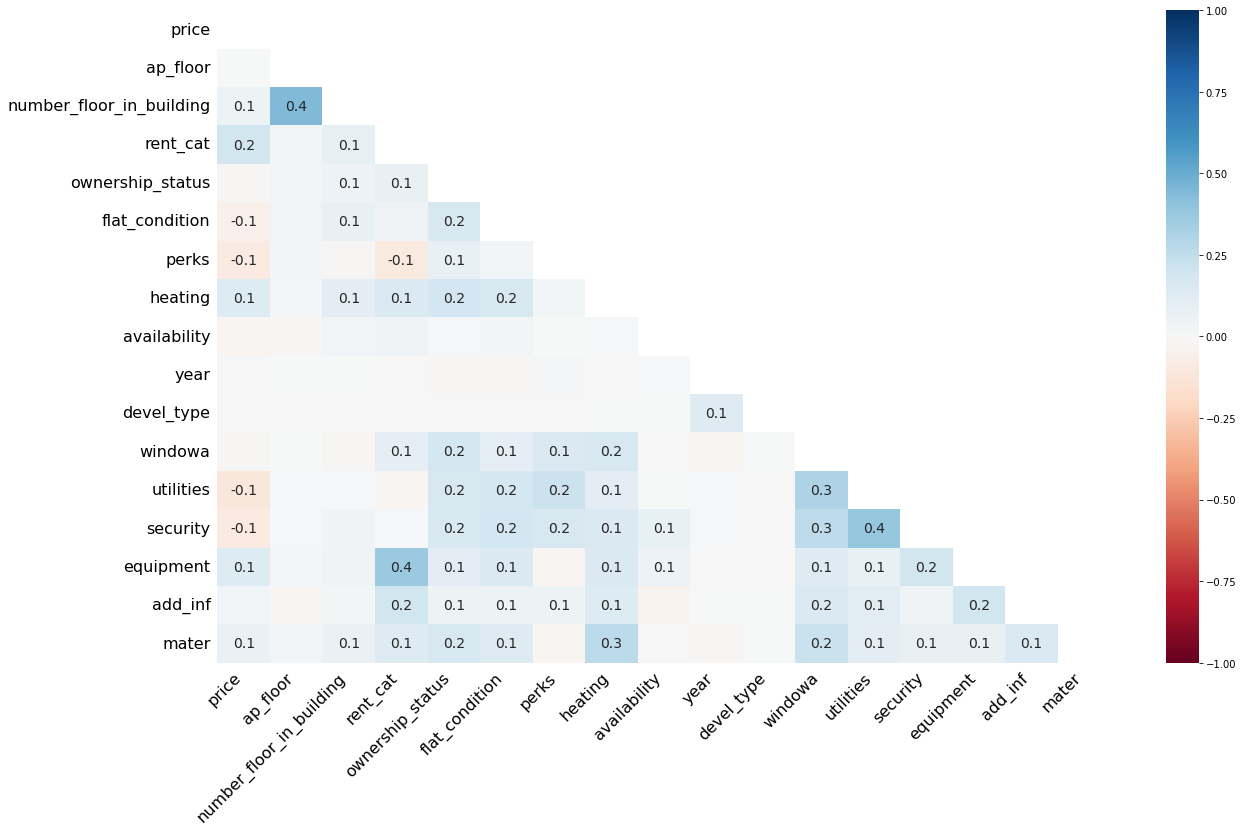

In [5]:
msno.heatmap(data_miss_value)
plt.show()

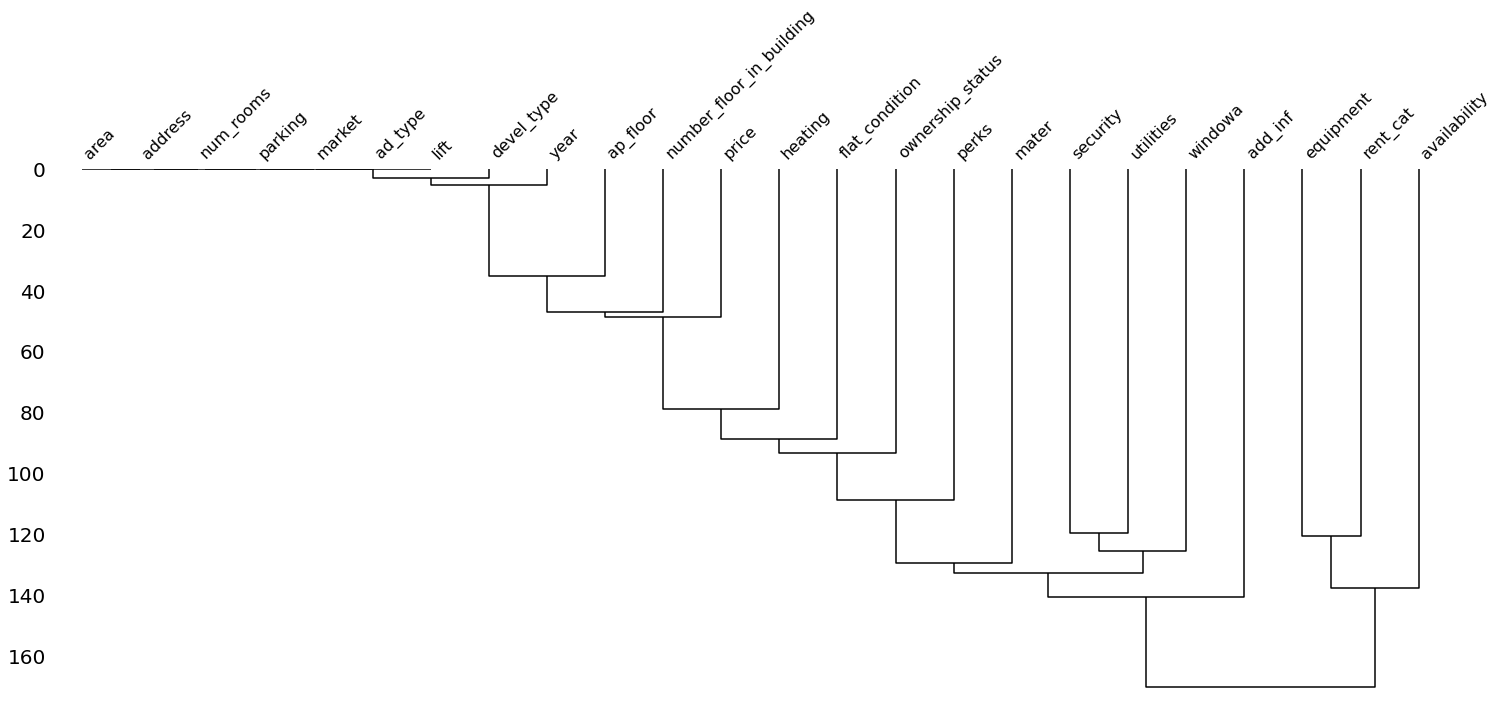

In [6]:
msno.dendrogram(data_miss_value)
plt.show()

Wnioski z analizy braków:
* wyrzucamy zmienną 'availability'
* usuwamy obserwacji bez wskazanej ceny
* usuwamy obserwacji bez kompletu danych o położeniu

In [ ]:
# po analizie braków
data_transformed = data_transformed[data_transformed['price'].notna()].drop('availability', axis=1)
data_transformed.info()

# Analiza obserwacji odstających

In [7]:
data_transformed.describe()

,price,area,num_rooms,rent,parking,year,rent_cat,number_floor_in_building,ap_floor,utilities_telewizja kablowa,...,add_inf_piwnica,add_inf_dwupoziomowe,add_inf_oddzielna kuchnia,add_inf_klimatyzacja,perks_balkon,perks_taras,perks_ogródek,na_prawach_powiatu,liczb_lud_kat,gest_lud_kat
count,4.467300e+04,46782.000000,46782.000000,21268.000000,46782.000000,46756.000000,21268.000000,44544.000000,45547.000000,46782.000000,...,46782.000000,46782.000000,46782.000000,46782.000000,46782.000000,46782.000000,46782.000000,46782.000000,46782.000000,46782.000000
mean,6.780711e+05,70.011095,2.673015,684.699062,0.561177,1998.217747,1.593286,4.360138,2.054910,0.417789,...,0.349750,0.051345,0.186952,0.078791,0.619768,0.161088,0.144885,0.685242,4.883032,3.094972
std,5.757708e+05,2113.114657,0.926502,8285.701323,0.496249,83.953663,0.646686,10.077346,1.912156,0.493200,...,0.476896,0.220702,0.389877,0.269415,0.485449,0.367616,0.351988,0.464424,2.274262,1.681617
min,5.285000e+03,1.000000,1.000000,0.010000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000e+05,43.190000,2.000000,400.000000,0.000000,1983.000000,1.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000
50%,5.590000e+05,55.230000,3.000000,540.000000,1.000000,2020.000000,2.000000,4.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,3.000000
75%,7.700000e+05,69.790000,3.000000,700.000000,1.000000,2023.000000,2.000000,5.000000,3.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,7.000000,4.000000
max,2.500000e+07,457000.000000,6.000000,850000.000000,1.000000,2027.000000,6.000000,2019.000000,52.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000


*Tutaj będą wykresy rozkładów oraz barploty*

              price           area     num_rooms           rent          year  \
count  4.467300e+04   46782.000000  46782.000000   21268.000000  46756.000000   
mean   6.780711e+05      70.011095      2.673015     684.699062   1998.217747   
std    5.757708e+05    2113.114657      0.926502    8285.701323     83.953663   
min    5.285000e+03       1.000000      1.000000       0.010000      1.000000   
25%    4.000000e+05      43.190000      2.000000     400.000000   1983.000000   
50%    5.590000e+05      55.230000      3.000000     540.000000   2020.000000   
75%    7.700000e+05      69.790000      3.000000     700.000000   2023.000000   
max    2.500000e+07  457000.000000      6.000000  850000.000000   2027.000000   

       number_floor_in_building      ap_floor  
count              44544.000000  45547.000000  
mean                   4.360138      2.054910  
std                   10.077346      1.912156  
min                    1.000000      0.000000  
25%                    3.00000

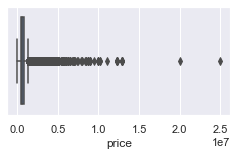

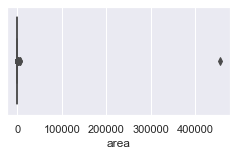

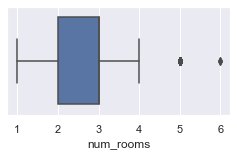

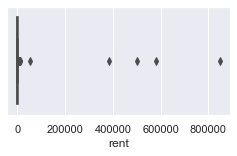

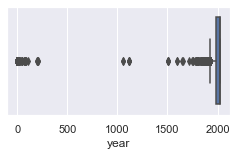

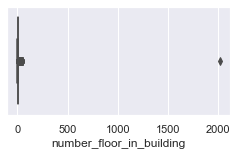

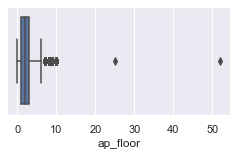

In [8]:
sns.set_theme(style="darkgrid")
plt.rcParams["figure.figsize"] = (4,2)

box_plot_var = ['price', 'area', 'num_rooms', 'rent', 'year', 'number_floor_in_building', 'ap_floor']

print(data_transformed[box_plot_var].describe())

for var in box_plot_var:
    sns.boxplot(data = data_transformed, x = var)
    plt.show()

In [9]:
count_plot_var_1 = ['ownership_status', 'flat_condition','parking', 'heating',
                    'market', 'ad_type','devel_type', 'windowa', 'lift', 'mater']
for var in count_plot_var_1:
    print(data_transformed[var].value_counts(normalize=True))
    print()      

pełna własność                       0.786414
nie podano                           0.174383
spółdzielcze wł. prawo do lokalu     0.033710
udział                               0.003655
użytkowanie wieczyste / dzierżawa    0.001838
Name: ownership_status, dtype: float64

do zamieszkania    0.401864
do wykończenia     0.378671
nie podano         0.159570
do remontu         0.059895
Name: flat_condition, dtype: float64

1    0.561177
0    0.438823
Name: parking, dtype: float64

miejskie         0.581976
gazowe           0.186632
nie podano       0.128853
inne             0.056069
kotłownia        0.025181
elektryczne      0.019837
piece kaflowe    0.001454
Name: heating, dtype: float64

wtórny       0.571523
pierwotny    0.428477
Name: market, dtype: float64

biuro nieruchomości    0.717391
deweloper              0.164187
prywatny               0.118422
Name: ad_type, dtype: float64

blok                0.527853
apartamentowiec     0.295092
kamienica           0.109679
szeregowiec         

In [10]:
count_plot_var_2 = [['utilities_telewizja kablowa',
                     'utilities_internet', 'utilities_telefon'],
                    ['security_drzwi / okna antywłamaniowe', 'security_teren zamknięty',
                     'security_domofon / wideofon', 'security_monitoring / ochrona',
                     'security_rolety antywłamaniowe', 'security_system alarmowy'],
                    ['equipment_zmywarka', 'equipment_lodówka', 'equipment_meble',
                     'equipment_piekarnik', 'equipment_kuchenka', 'equipment_pralka',
                     'equipment_telewizor'],
                    ['add_inf_pom. użytkowe', 'add_inf_piwnica',
                     'add_inf_dwupoziomowe', 'add_inf_oddzielna kuchnia',
                     'add_inf_klimatyzacja']]
for list_of_vars in count_plot_var_2:
    for var in list_of_vars:
        print(f'{var}:', sum(data_transformed[var])/len(data_transformed)*100, '%')
    print()

utilities_telewizja kablowa: 41.77888931640374 %
utilities_internet: 52.17605061775896 %
utilities_telefon: 25.26399042366722 %

security_drzwi / okna antywłamaniowe: 27.45714163567184 %
security_teren zamknięty: 22.053353854046428 %
security_domofon / wideofon: 55.968107391731856 %
security_monitoring / ochrona: 27.313924158864523 %
security_rolety antywłamaniowe: 4.927108717027917 %
security_system alarmowy: 7.402419734085759 %

equipment_zmywarka: 13.712539010730623 %
equipment_lodówka: 18.090291137617033 %
equipment_meble: 27.382326535847117 %
equipment_piekarnik: 17.35496558505408 %
equipment_kuchenka: 18.41306485400368 %
equipment_pralka: 12.840408704202472 %
equipment_telewizor: 6.365696207943226 %

add_inf_pom. użytkowe: 19.285195160531828 %
add_inf_piwnica: 34.97499038091574 %
add_inf_dwupoziomowe: 5.134453422256423 %
add_inf_oddzielna kuchnia: 18.6952246590569 %
add_inf_klimatyzacja: 7.879098798683254 %



## Wykresy zmiennych po analizie obserwacji odstających

In [ ]:
def outlier_drop(data,maxfloor,minprice,maxprice,minarea,maxarea,minyear,categories_to_replace):
    data = data[data['price'] <= maxprice]
    data = data[data['price'] >= minprice]
    
    data = data[data['area'] <= maxarea]
    data = data[data['area'] >= minarea]
    
    data = data[(data['number_floor_in_building'] <= maxfloor)|(data['number_floor_in_building'].isna())]
    data = data[(data['ap_floor'] <= maxfloor)|(data['ap_floor'].isna())]
    
    data['year'] = data['year'].apply(lambda x: x if x>=minyear else np.nan)
    
    data.replace(categories_to_replace, 'other', inplace = True)
    
    return data

In [ ]:
categories_to_replace = ['spółdzielcze wł. prawo do lokalu', 'udział', 'użytkowanie wieczyste / dzierżawa',
                         'kotłownia', 'elektryczne', 'piece kaflowe',
                         'plomba', 'loft', 'dom wolnostojący', 'szeregowiec',
                         'drewniane', 'aluminiowe',
                         'drewno', 'keramzyt', 'beton', 'beton komórkowy', 'żelbet',
                         'inne', 'inny']

data_clean = outlier_drop(data_transformed,
                          maxfloor = 100,
                          minprice = 50000, maxprice = 2000000,
                          minarea = 10, maxarea = 300,
                          minyear = 1800,
                          categories_to_replace = categories_to_replace)
print("Usunięto:", len(data_transformed) - len(data_clean))
print((len(data_transformed) - len(data_clean))/len(data_transformed)*100, "% zbioru")

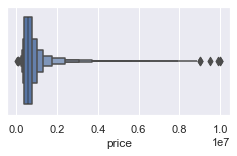

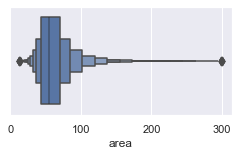

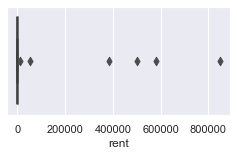

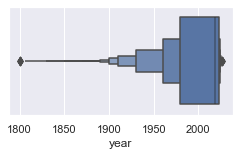

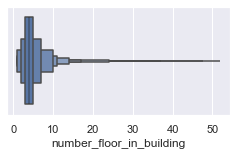

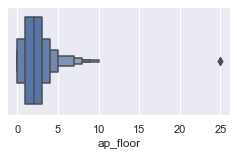

In [ ]:
box_plot_var = ['price', 'area', 'rent', 'year', 'number_floor_in_building', 'ap_floor']
for var in box_plot_var:
    sns.boxenplot(data = data_clean, x = var)
    plt.show()

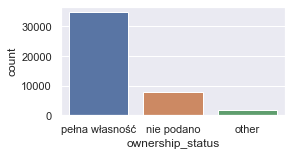

pełna własność    0.784058
nie podano        0.175111
other             0.040831
Name: ownership_status, dtype: float64


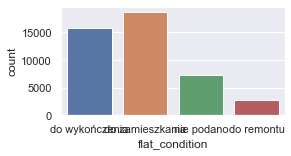

do zamieszkania    0.420277
do wykończenia     0.353562
nie podano         0.163503
do remontu         0.062658
Name: flat_condition, dtype: float64


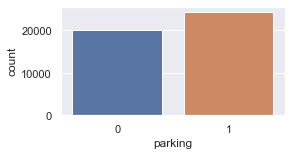

1    0.547207
0    0.452793
Name: parking, dtype: float64


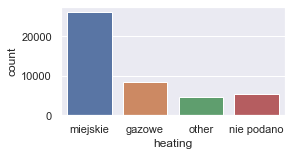

miejskie      0.587791
gazowe        0.189790
nie podano    0.118661
other         0.103758
Name: heating, dtype: float64


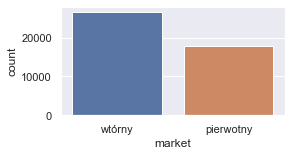

wtórny       0.598391
pierwotny    0.401609
Name: market, dtype: float64


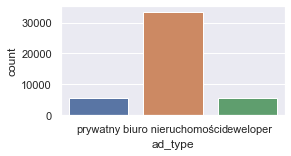

biuro nieruchomości    0.751003
deweloper              0.124891
prywatny               0.124106
Name: ad_type, dtype: float64


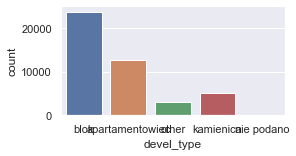

blok               0.533671
apartamentowiec    0.284024
kamienica          0.113932
other              0.068171
nie podano         0.000202
Name: devel_type, dtype: float64


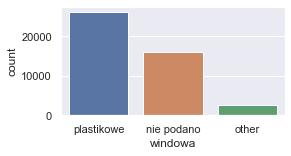

plastikowe    0.584855
nie podano    0.358851
other         0.056294
Name: windowa, dtype: float64


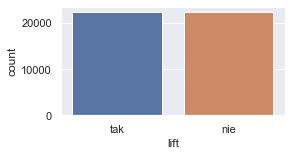

tak    0.501199
nie    0.498801
Name: lift, dtype: float64


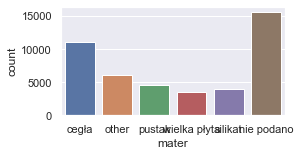

nie podano      0.349999
cegła           0.246084
other           0.134841
pustak          0.101091
silikat         0.088004
wielka płyta    0.079981
Name: mater, dtype: float64


In [ ]:
count_plot_var_1 = ['ownership_status', 'flat_condition','parking', 'heating',
                    'market', 'ad_type','devel_type', 'windowa', 'lift', 'mater']
for var in count_plot_var_1:
    sns.countplot(data = data_clean, x = var)
    plt.show()
    print(data_clean[var].value_counts(normalize=True))  

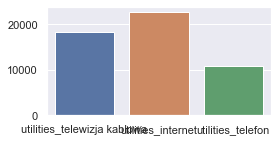

utilities_telewizja kablowa: 41.09764023037447 %
utilities_internet: 50.852699280640024 %
utilities_telefon: 24.052618604755395 %


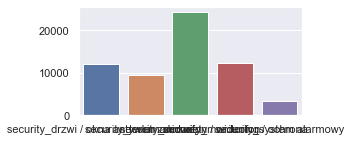

security_drzwi / okna antywłamaniowe: 27.00625238105909 %
security_teren zamknięty: 21.177419716289805 %
security_domofon / wideofon: 54.65791183918607 %
security_monitoring / ochrona: 27.322232929206912 %
security_system alarmowy: 7.632835085045829 %


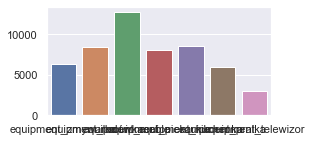

equipment_zmywarka: 14.290836564103712 %
equipment_lodówka: 18.87591600744011 %
equipment_meble: 28.626493064114918 %
equipment_piekarnik: 18.134146068171123 %
equipment_kuchenka: 19.214306523541673 %
equipment_pralka: 13.405642829930752 %
equipment_telewizor: 6.615422539945767 %


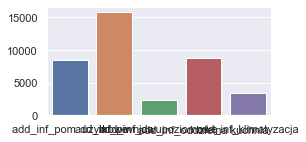

add_inf_pom. użytkowe: 19.030544786320956 %
add_inf_piwnica: 35.49066624834726 %
add_inf_dwupoziomowe: 5.116195683840172 %
add_inf_oddzielna kuchnia: 19.505636106940365 %
add_inf_klimatyzacja: 7.749366918405307 %


In [ ]:
count_plot_var_2 = [['utilities_telewizja kablowa',
                     'utilities_internet', 'utilities_telefon'],
                    ['security_drzwi / okna antywłamaniowe', 'security_teren zamknięty',
                     'security_domofon / wideofon', 'security_monitoring / ochrona',
                     'security_system alarmowy'],
                    ['equipment_zmywarka', 'equipment_lodówka', 'equipment_meble',
                     'equipment_piekarnik', 'equipment_kuchenka', 'equipment_pralka',
                     'equipment_telewizor'],
                    ['add_inf_pom. użytkowe', 'add_inf_piwnica',
                     'add_inf_dwupoziomowe', 'add_inf_oddzielna kuchnia',
                     'add_inf_klimatyzacja']]
for list_of_vars in count_plot_var_2:
    sum_of_var = []
    for var in list_of_vars:
        sum_of_var.append(sum(data_clean[var]))
    sns.barplot(x= list_of_vars, y = sum_of_var)
    plt.show()
    for var in list_of_vars:
        print(f'{var}:', sum(data_clean[var])/len(data_clean)*100, '%')